In [1]:
import tensorflow as tf


In [2]:
tf.__version__

'2.15.0'

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pwd


'/content'

In [5]:
cd "/content/drive/MyDrive/DeepLearning"

/content/drive/MyDrive/DeepLearning


In [6]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [7]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=eb4e8323675a8a31d52db4094298421842a96560a4ea8798052fa562effd5cff
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [8]:
import wget
wget.download(link)

'traffic-signs-data (1).zip'

In [9]:
data = "./"
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
train_link = data + "train.p"
test_link = data + "test.p"
valid_link = data + "valid.p"

In [11]:
import pickle

In [12]:
with open(train_link, mode = "rb") as f:
  train = pickle.load(f)

In [13]:
with open(test_link, mode = "rb") as f:
  test = pickle.load(f)
with open(valid_link, mode = "rb") as f:
  valid = pickle.load(f)

In [14]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [15]:
trainX = train["features"]
trainY = train["labels"]

In [16]:
import matplotlib.pyplot as plt

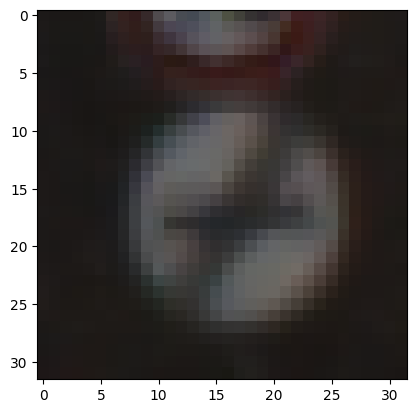

In [17]:
plt.imshow(trainX[0])

In [18]:
trainY[0]

41

In [19]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}




In [20]:
classNames[trainY[0]]

'End of no passing'

In [21]:
from sklearn.utils import shuffle

In [22]:
trainX, trainY = shuffle(trainX, trainY)

In [23]:
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [24]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [25]:
from sklearn.preprocessing import LabelBinarizer


In [26]:
lb = LabelBinarizer()

In [27]:
trainY = lb.fit_transform(trainY)

In [28]:
validY = lb.fit_transform(validY)

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [30]:
model = Sequential()
width = 32
height = 32
classes = 43

In [31]:
shape = (width, height, 3)

In [32]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape= shape))

In [33]:
model.add(Activation("relu"))

In [34]:
model.add(BatchNormalization())

In [35]:
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [38]:

model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(512))

In [41]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [42]:
model.add(Dense(classes))
model.add(Activation("softmax"))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [44]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [45]:
learning_rate = 0.01

In [46]:
epochs = 10
# epoch
# Steps
#
batch_size = 64

In [47]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [48]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10


<ipython-input-49-96a4836c8487>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)


543/543 [==============================] - 38s 56ms/step - loss: 1.9700 - accuracy: 0.4307 - val_loss: 1.8120 - val_accuracy: 0.4578
Epoch 2/10
543/543 [==============================] - 34s 63ms/step - loss: 0.7950 - accuracy: 0.7354 - val_loss: 1.2692 - val_accuracy: 0.6243
Epoch 3/10
543/543 [==============================] - 32s 58ms/step - loss: 0.4016 - accuracy: 0.8672 - val_loss: 0.8064 - val_accuracy: 0.7651
Epoch 4/10
543/543 [==============================] - 25s 46ms/step - loss: 0.2377 - accuracy: 0.9231 - val_loss: 1.2094 - val_accuracy: 0.7170
Epoch 5/10
543/543 [==============================] - 25s 46ms/step - loss: 0.1664 - accuracy: 0.9472 - val_loss: 0.6021 - val_accuracy: 0.8363
Epoch 6/10
543/543 [==============================] - 26s 49ms/step - loss: 0.1201 - accuracy: 0.9618 - val_loss: 0.6661 - val_accuracy: 0.8363
Epoch 7/10
543/543 [==============================] - 24s 45ms/step - loss: 0.0930 - accuracy: 0.9701 - val_loss: 0.6113 - val_accuracy: 0.8556
Epo

In [51]:
model.save("RoadSignalsClassification")